In [16]:
library(astsa)
data(jj, package='astsa')

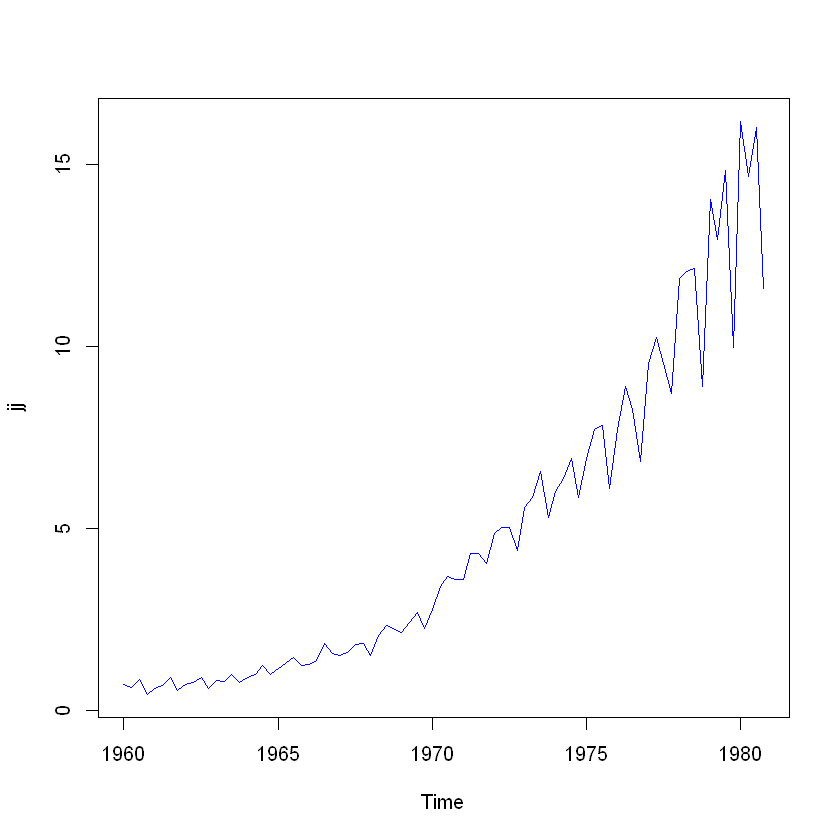

In [17]:
plot(jj,col='blue')

We observe increasing variance ie HETEROSCEDASTICITY

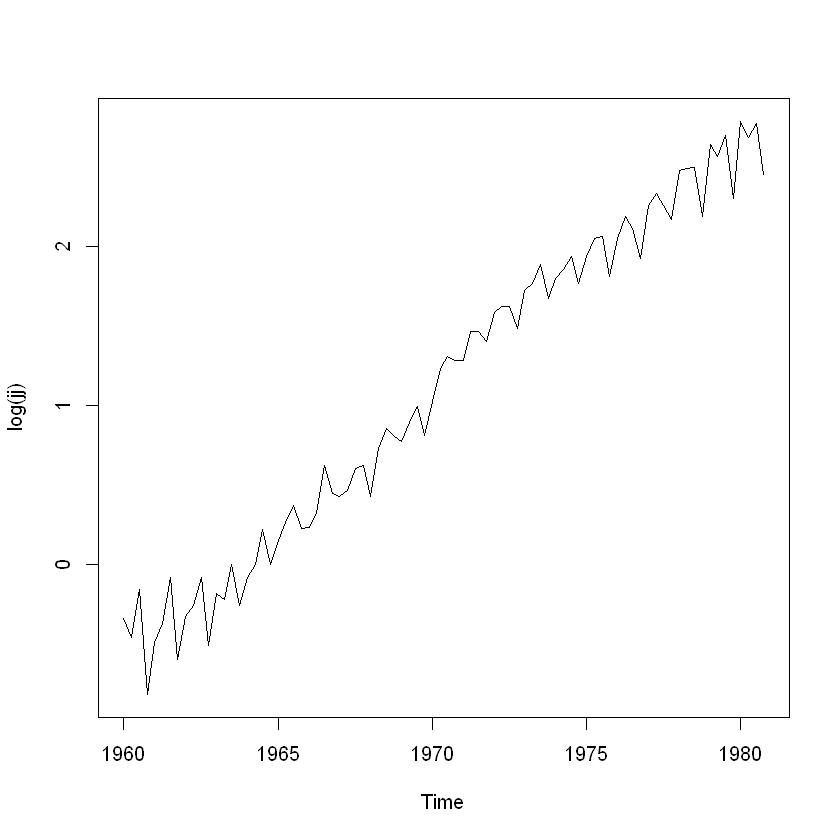

In [18]:
plot(log(jj))

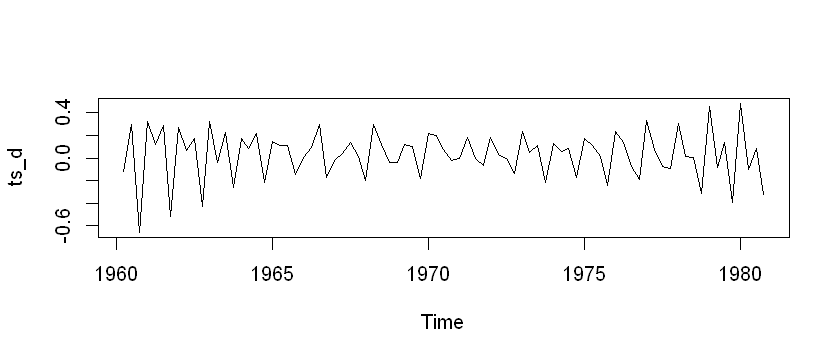

In [19]:
options(repr.plot.width=7, repr.plot.height=3)
ts_d=diff(log(jj))
plot(ts_d)

Let X<sub>t</sub>=log jj then diff(X<sub>t</sub>) is stationary hence we take non seasonal difference d=1

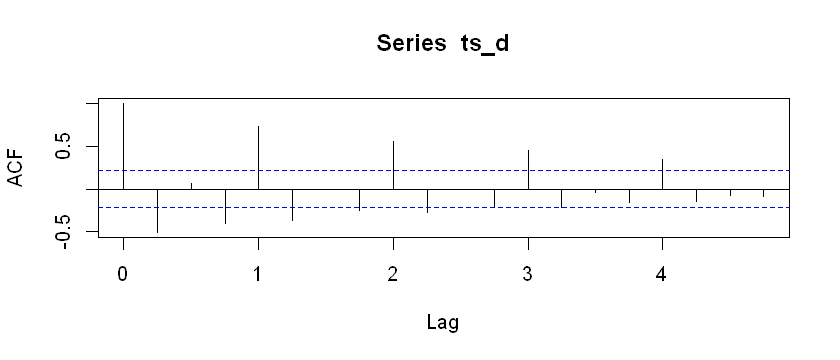

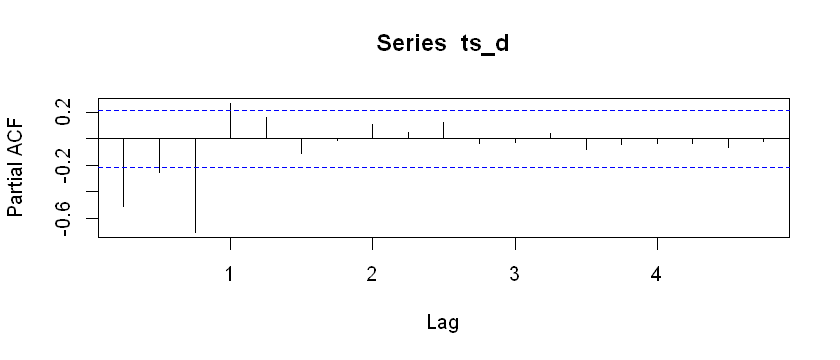

In [20]:
options(repr.plot.width=7, repr.plot.height=3)           
acf(ts_d)
pacf(ts_d)

From ACF we notice spikes around season ie lag 1,2,3,4 (these are years) ie significant autocorrelation between <br>
<li> <b>qx_now_year </b> and <b>qx_prev_year </b> ,and <br>
<li> <b>qx_now_year </b> and <b>qx_prev_prev_year </b>  (because of induced correlation due to above)<br> 
<li> and so on... <br>
    -->qx represents any of the 4 quarters <br>
This suggests that we do a D=1 differencing with s=4 <br>
    (we can also do s=2 since same is evident for half yearly as seen by ACF spikes)

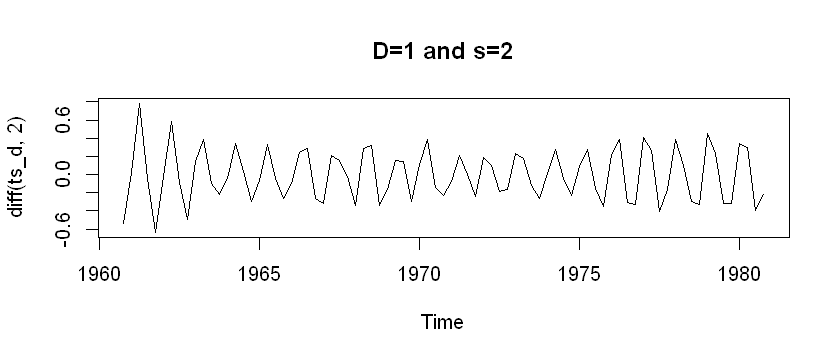

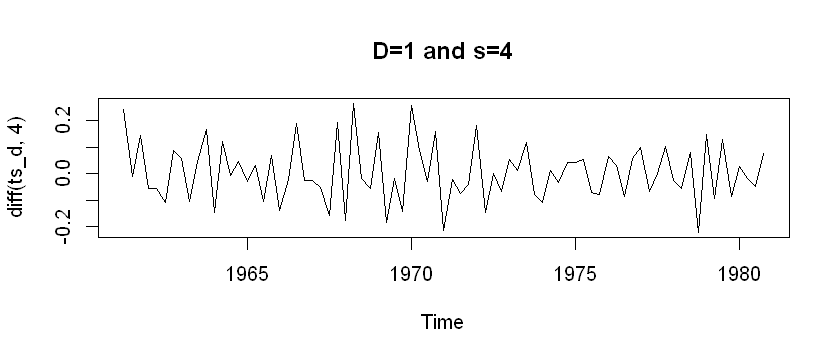

In [21]:
plot(diff(ts_d,2), main='D=1 and s=2')
plot(diff(ts_d,4), main='D=1 and s=4')

### We proceed with d=1, D=1 and s=4

Now we check if this series is a white noise:

In [22]:
ts_Dds=diff(ts_d,4)
Box.test(ts_Dds, lag=log(length(ts_Dds)))


	Box-Pierce test

data:  ts_Dds
X-squared = 20.95, df = 4.3694, p-value = 0.0004658


This clearly has non zero autocorrelations hence the series is not a white noise. We can proceed further to model this series.

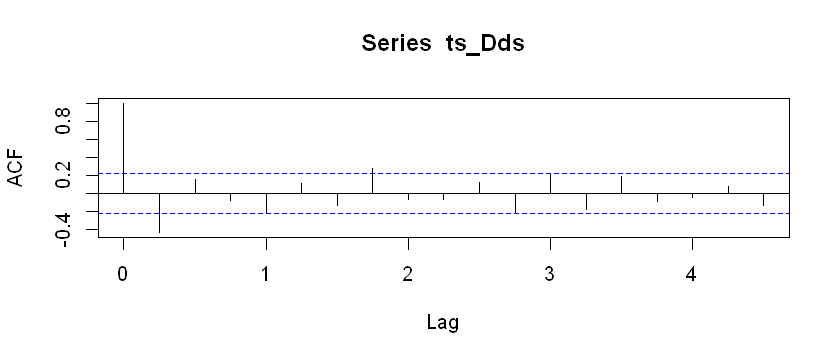

In [23]:
acf(ts_Dds)

The ACF tells us about MA:
<li> we must have MA(q=2)
<li> we must also have seasonally (Q=4)            (taken as 1 since period s=4) 

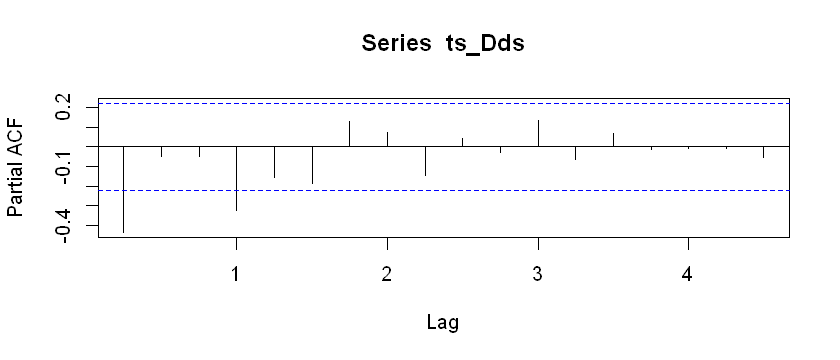

In [24]:
pacf(ts_Dds)

The PACF tells us about AR:

<li> we must have AR(p=1)
<li> we must also have seasonally (P=4) (taken as 1 since period s=4)

<center> <h3>We try: 0≤𝑝,𝑃,𝑄≤1 with 0≤𝑞≤2 <br>
    <center> d=1 and D=1

In [25]:
d=1
D=1
per=4                              #period for seasonality
cat('period:', per,'\n')
for(p in 1:2){
  for(q in 1:3){
    for(P in 1:2){
      for(Q in 1:2){
        
          model<-arima(x=log(jj), order = c((p-1),d,(q-1)), seasonal = list(order=c((P-1),D,(Q-1)), period=per))
          pval<-Box.test(model$residuals, lag=log(length(model$residuals)))
          sse<-sum(model$residuals^2)
          cat(p-1,d,q-1,P-1,D,Q-1,per,'AIC=', model$aic, ' SSE=',sse,' p-VALUE=', pval$p.value,'\n')
        
      }
    }
  }
}

period: 4 
0 1 0 0 1 0 4 AIC= -124.0685  SSE= 0.9377871  p-VALUE= 0.0002610795 
0 1 0 0 1 1 4 AIC= -126.3493  SSE= 0.8856994  p-VALUE= 0.0001606542 
0 1 0 1 1 0 4 AIC= -125.9198  SSE= 0.8908544  p-VALUE= 0.0001978052 
0 1 0 1 1 1 4 AIC= -124.3648  SSE= 0.8854554  p-VALUE= 0.000157403 
0 1 1 0 1 0 4 AIC= -145.5139  SSE= 0.6891988  p-VALUE= 0.03543717 
0 1 1 0 1 1 4 AIC= -150.7528  SSE= 0.6265214  p-VALUE= 0.6089542 
0 1 1 1 1 0 4 AIC= -150.9134  SSE= 0.6251634  p-VALUE= 0.7079173 
0 1 1 1 1 1 4 AIC= -149.1317  SSE= 0.6232876  p-VALUE= 0.6780876 
0 1 2 0 1 0 4 AIC= -144.9542  SSE= 0.6755184  p-VALUE= 0.1378815 
0 1 2 0 1 1 4 AIC= -148.7632  SSE= 0.6264327  p-VALUE= 0.6004601 
0 1 2 1 1 0 4 AIC= -148.9157  SSE= 0.6251336  p-VALUE= 0.7145189 
0 1 2 1 1 1 4 AIC= -147.1355  SSE= 0.6232433  p-VALUE= 0.6871046 
1 1 0 0 1 0 4 AIC= -139.8248  SSE= 0.7467494  p-VALUE= 0.03503386 
1 1 0 0 1 1 4 AIC= -146.0191  SSE= 0.6692691  p-VALUE= 0.5400205 
1 1 0 1 1 0 4 AIC= -146.0319  SSE= 0.6689661  p-VALU

Warning message in log(s2):
"NaNs produced"

1 1 2 0 1 1 4 AIC= -147.7011  SSE= 0.6056119  p-VALUE= 0.6329377 
1 1 2 1 1 0 4 AIC= -148.3551  SSE= 0.6123972  p-VALUE= 0.9543997 
1 1 2 1 1 1 4 AIC= -142.9602  SSE= 0.6060436  p-VALUE= 0.3705063 


Take high value from Ljung Box and low value(most negative here) on AIC criterion. We select the 0 1 1 1 1 0 4 model for SARIMA

initial  value -2.237259 
iter   2 value -2.429075
iter   3 value -2.446738
iter   4 value -2.455821
iter   5 value -2.459761
iter   6 value -2.462511
iter   7 value -2.462602
iter   8 value -2.462749
iter   9 value -2.462749
iter   9 value -2.462749
iter   9 value -2.462749
final  value -2.462749 
converged
initial  value -2.411490 
iter   2 value -2.412022
iter   3 value -2.412060
iter   4 value -2.412062
iter   4 value -2.412062
iter   4 value -2.412062
final  value -2.412062 
converged


$fit

Call:
stats::arima(x = xdata, order = c(p, d, q), seasonal = list(order = c(P, D, 
    Q), period = S), include.mean = !no.constant, transform.pars = trans, fixed = fixed, 
    optim.control = list(trace = trc, REPORT = 1, reltol = tol))

Coefficients:
          ma1     sar1
      -0.6796  -0.3220
s.e.   0.0969   0.1124

sigma^2 estimated as 0.007913:  log likelihood = 78.46,  aic = -150.91

$degrees_of_freedom
[1] 77

$ttable
     Estimate     SE t.value p.value
ma1   -0.6796 0.0969 -7.0104  0.0000
sar1  -0.3220 0.1124 -2.8641  0.0054

$AIC
[1] -1.840408

$AICc
[1] -1.838555

$BIC
[1] -1.753721


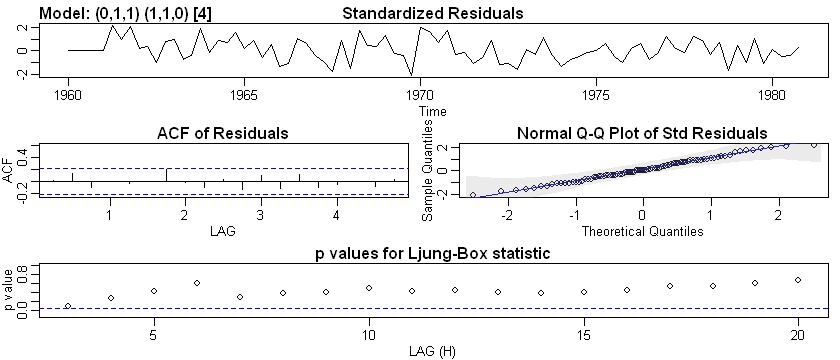

In [26]:
sarima(log(jj),0,1,1,1,1,0,4)

Estimated model:<br><h2><Center>𝑋<sub>𝑡</sub>=𝐸𝑎𝑟𝑛𝑖𝑛𝑔𝑠 <br><br>
𝑌<sub>𝑡</sub>=log𝑋<sub>𝑡</sub> <br><br>
(1−Φ𝐵<sup>4</sup>)(1−𝐵)(1−𝐵<sup>4</sup>)𝑌<sub>𝑡</sub>=(1+𝜃𝐵)𝑍<sub>𝑡</sub><br><br>
    Φ=-0.3220, 𝜃=-0.6796 <br><br>
    𝑍<sub>𝑡</sub>~𝑁𝑜𝑟𝑚𝑎𝑙(0,0.0079)
    

In [27]:
model<-arima(x=log(jj), order = c(0,1,1), seasonal = list(order=c(1,1,0), period=4))
model


Call:
arima(x = log(jj), order = c(0, 1, 1), seasonal = list(order = c(1, 1, 0), period = 4))

Coefficients:
          ma1     sar1
      -0.6796  -0.3220
s.e.   0.0969   0.1124

sigma^2 estimated as 0.007913:  log likelihood = 78.46,  aic = -150.91

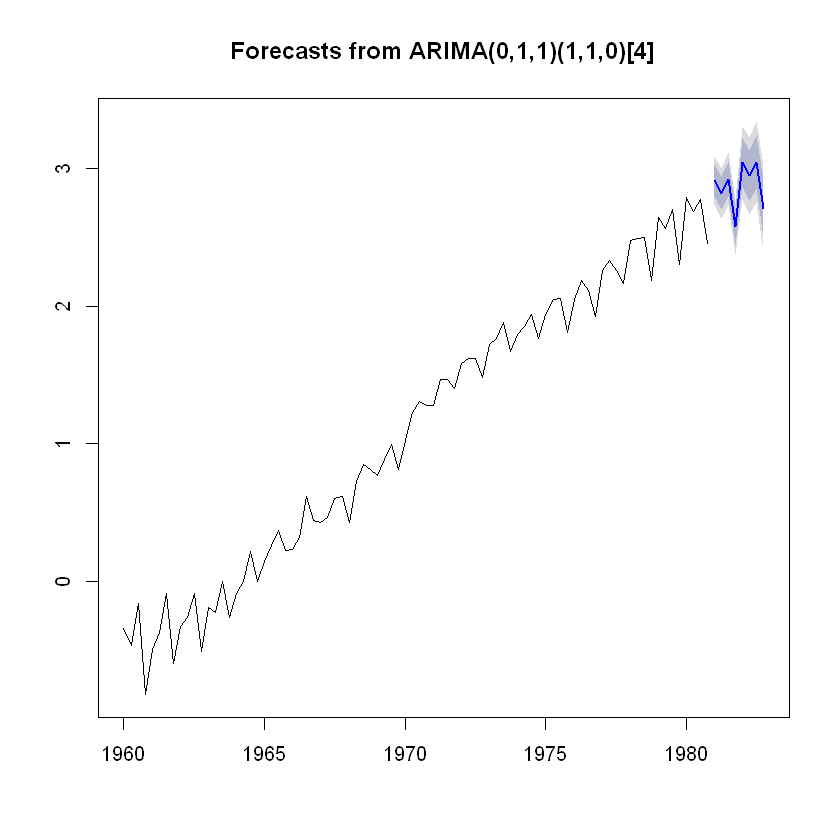

In [28]:
library(forecast)
#default IKernel plot size set
options(repr.plot.width=7, repr.plot.height=7)           
plot(forecast(model))

In [29]:
forecast(model)

        Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
1981 Q1       2.910254 2.796250 3.024258 2.735900 3.084608
1981 Q2       2.817218 2.697507 2.936929 2.634135 3.000300
1981 Q3       2.920738 2.795580 3.045896 2.729325 3.112151
1981 Q4       2.574797 2.444419 2.705175 2.375401 2.774194
1982 Q1       3.041247 2.868176 3.214317 2.776559 3.305934
1982 Q2       2.946224 2.762623 3.129824 2.665431 3.227016
1982 Q3       3.044757 2.851198 3.238316 2.748735 3.340780
1982 Q4       2.706534 2.503505 2.909564 2.396028 3.017041